In [1]:
import pandas as pd
from glob import glob
from pathlib import Path
import intake
from pkg_resources import resource_filename
import os

import cook_inlet_catalogs as cic

# Demo Notebook: EcoFOCI Drifters

As described on the [main project website for EcoFOCI](https://www.ecofoci.noaa.gov/):

> We study the ecosystems of the North Pacific Ocean, Bering Sea and U.S. Arctic to improve understanding of ecosystem dynamics and we apply that understanding to the management of living marine resources. EcoFOCI scientists integrate field, laboratory and modeling studies to determine how varying biological and physical factors influence large marine ecosystems within Alaskan waters.

> EcoFOCI is a joint research program between the Alaska Fisheries Science Center (NOAA/ NMFS/ AFSC) and the Pacific Marine Environmental Laboratory (NOAA/ OAR/ PMEL).

Drifter data are being pulled from this webpage: https://www.ecofoci.noaa.gov/drifters/efoci_drifterData.shtml which also has a plot available for each drifter dataset.

Several years of EcoFOCI drifter data are also available in a private Research Workspace project: https://researchworkspace.com/project/41531085/files.

Initial definitions:

In [2]:
cat_name = "drifters_ecofoci"

## Demo Using Intake Catalog

In [14]:

base_dir = resource_filename('cook_inlet_catalogs', '')
cat_path = os.path.join(base_dir, f"catalogs/{cat_name}.yaml")
cat = intake.open_catalog(cat_path)

All datasets in the catalog:

In [15]:
[entry for entry in cat.entries if cic.utils.is_key(entry)]

['106696_y2012_withTandIce',
 '106697_y2012_withTandIce',
 '111968_y2012_withTandIce',
 '111969_y2013_withT',
 '111970_y2013_withT',
 '111971_y2013_withT',
 '111973_y2013_withT',
 '111974_y2013_withT',
 '111976_y2013_withT',
 '113633_y2012_withT',
 '113634_y2012_withT',
 '113635_y2012_withTandIce',
 '113636_y2012_withTandIce',
 '113637_y2012_withTandIce',
 '113638_y2012_withTandIce',
 '113639_y2012_withTandIce',
 '113640_y2012_withTandIce',
 '113641_y2012_withTandIce',
 '113642_y2012_withTandIce',
 '119593_y2012_withTandIce',
 '119594_y2012_withTandIce',
 '119595_y2012_withTandIce',
 '119596_y2012_withTandIce',
 '119597_y2012_withTandIce',
 '119598_y2012_withTandIce',
 '119599_y2012_withTandIce',
 '119600_y2012_withTandIce',
 '122532_y2013_withT',
 '122533_y2013_withT',
 '122534_y2013_withTandIce',
 '122535_y2013_withTandIce',
 '122536_y2013_withTandIce',
 '122537_y2013_withTandIce',
 '122538_y2013_withTandIce',
 '122539_y2013_withTandIce',
 '122540_y2013_withTandIce',
 '122541_y2013_w

Select one to look at:

In [16]:
dataset_id = "36254_y2003"

In [17]:
df = cat[dataset_id].read()
df

,datetime,longitude_E,latitude_N,depth_m
0,2003-09-16 17:02:00,-148.941,59.282,40
1,2003-09-16 19:24:00,-148.984,59.287,40
2,2003-09-16 21:01:00,-148.999,59.294,40
3,2003-09-16 21:59:00,-149.046,59.298,40
4,2003-09-16 23:27:00,-149.000,59.313,40
...,...,...,...,...
132,2003-09-22 06:40:00,-149.528,59.278,40
133,2003-09-22 07:15:00,-149.522,59.274,40
134,2003-09-22 08:54:00,-149.525,59.273,40
135,2003-09-22 10:53:00,-149.509,59.269,40


## Plot Data

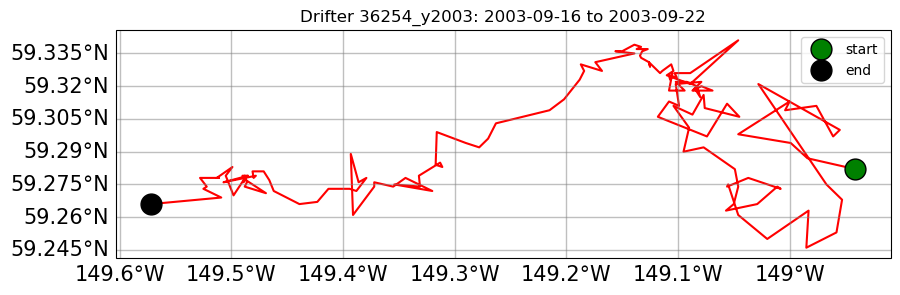

In [18]:
fig = cic.utils.plot_map(df, dataset_id)